# Data visualisation and Text Analysis

## Micro-narratives from the Effectiveness Review Jordan 

[Simone Lombardini](https://sites.google.com/view/simone-lombardini/home-page) - 23 June 2020

This notebook use data from the [Effectiveness Review in Jordan](https://policy-practice.oxfam.org.uk/publications/livelihoods-in-the-zaatari-camp-impact-evaluation-of-oxfams-cash-for-work-activ-620883) to explore how do conduct data visualization using the `seaborn` library and perform some Text Analysis on the open ended answers provided during the interview. 

In [2]:
# basic
import os
import pandas as pd
import numpy as np    
import datetime as dt

# graphs
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# text analysis
import string 
import re 
import nltk
import regex

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

from textblob import TextBlob

# word clouds
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# word frequency
from collections import Counter

In [55]:
df = pd.read_stata('data/sensemakerSM.dta')

In [56]:
df.rename(columns={'seeking': 'seeking_v1'}, inplace=True)
df.rename(columns={'v7': 'seeking_v2'}, inplace=True)
df.rename(columns={'v8': 'seeking_v3'}, inplace=True)
df.rename(columns={'outcome': 'outcome_v1'}, inplace=True)
df.rename(columns={'v13': 'outcome_v2'}, inplace=True)
df.rename(columns={'recommend': 'recommend_v1'}, inplace=True)
df.rename(columns={'v17': 'recommend_v2'}, inplace=True)

In [57]:
col_list = ['seeking_v1', 'seeking_v2', 'seeking_v3', 'seekingx', 'seekingy', 'fragmententry', 'workwhat', 'workwhere', 'workyn', 'outcome_v1', 'outcome_v2', 'outcomex', 'recommend_v1', 'recommend_v2', 'recommendx']
df = df[col_list]

In [59]:
df.head()

,seeking_v1,seeking_v2,seeking_v3,seekingx,seekingy,fragmententry,workwhat,workwhere,workyn,outcome_v1,outcome_v2,outcomex,recommend_v1,recommend_v2,recommendx
0,80.512611,10.958138,8.529254,0.140083,0.094898,"since arriving, no job depite extensive search...",Work_Paid_NotCFW,WorkIn,WorkN,61.0,39.0,0.39,24.000000,76.0,0.76
1,45.536892,37.636333,16.826773,0.356449,0.325931,since I came in 2013 I was depressed and despe...,Work_CFW_Ox,WorkIn,WorkY,94.0,6.0,0.06,5.000001,95.0,0.95
2,36.249302,20.982674,42.768021,0.532594,0.181710,Ahmad arrived 5 years ago and started looking ...,Work_Paid_NotCFW,WorkIn,WorkN,86.0,14.0,0.14,7.999998,92.0,0.92
3,74.107315,5.460815,20.431868,0.231623,0.047291,I came to Jordan and then got married and star...,Work_CFW_Ox,WorkIn,WorkY,94.0,6.0,0.06,6.999999,93.0,0.93
4,35.801437,28.258423,35.940140,0.500694,0.244718,I worked with Oxfam as a raising awareness and...,Work_CFW_Ox,WorkIn,WorkY,77.0,23.0,0.23,0.000000,100.0,1.00


The variables of interest are:
* **fragmententry** [text] Can you share one such example with me? What work was/is it? What was/is the result of it? How do you see this experience? 
* **WorkWhat** [MCQ] Is this story is about: `Cash for work (with Oxfam)`, `Cash for work (with other agency)`, `Other work paid in money (not CFW)`, `Other work paid in exchange of goods (e.g. food, equipment, etc.)`, `Other work paid in exchange of services (e.g. childcare, trading skills, helping out, etc.)`, `Other work`
* **WorkWhere** [MCQ] Is this story about? `Work inside the camp` `Work outside the camp`
* **WorkYN** [MCQ] In your story, did you carry out this work (even if it was temporaty)
* **Seeking** [triad] In your story, when were you tying to access work, what were you mostly seeking? `Learining something for the future`, `Getting access to material resources`, `Feeling better at that moment (e.g. have things to do, meet people, independence, leave the house, etc.)`
* **Outcome** [slide] In your story, up to which extend did you achieve this? `entirely`, `not at all`
* **Recommend** [slide] Would you recommend to other friends in your situation to pursue similar work to the one in your story?  `not at all`, `entirealy`


## Visualization

**WorkWhat** [MCQ] Is this story is about: `Cash for work (with Oxfam)`, `Cash for work (with other agency)`, `Other work paid in money (not CFW)`, `Other work paid in exchange of goods (e.g. food, equipment, etc.)`, `Other work paid in exchange of services (e.g. childcare, trading skills, helping out, etc.)`, `Other work`

In [110]:
df['count']= 1
df_workwhat = df[['workwhat', 'count']].groupby('workwhat', as_index = False).count()
df_workwhat.head()

,workwhat,count
0,Other_w,511
1,Work_CFW_NOx,277
2,Work_CFW_Ox,434
3,Work_Paid_NotCFW,177
4,Work_Paid_goods,5


Text(0, 0.5, 'Type of work')

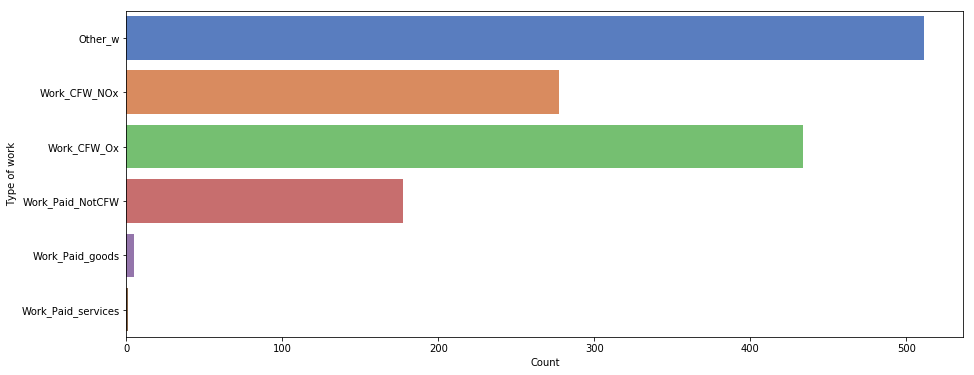

In [111]:
#sns.palplot(sns.color_palette("muted"))
plt.figure(figsize=(15,6))
sns.barplot(x="count", y="workwhat", data=df_workwhat, palette="muted")
plt.xlabel('Count')
plt.ylabel('Type of work')

 **WorkWhere** [MCQ] Is this story about? `Work inside the camp` `Work outside the camp`

Text(0, 0.5, 'Type of work')

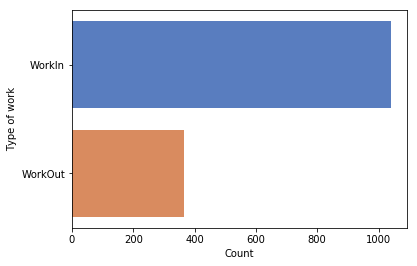

In [119]:
df['count']= 1
df_workwhere = df[['workwhere', 'count']].groupby('workwhere', as_index = False).count()
df_workwhere.head()

sns.barplot(x="count", y="workwhere", data=df_workwhere, palette="muted")
plt.xlabel('Count')
plt.ylabel('Type of work')

**Outcome** [slide] In your story, up to which extend did you achieve this? `entirely`, `not at all`

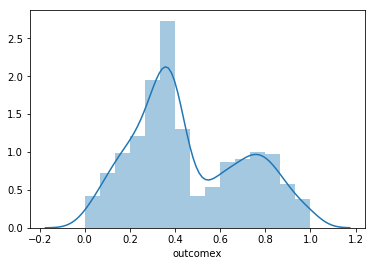

In [139]:
x = df.outcomex.fillna(df.outcomex.median())
sns.distplot(x)

Text(0.5, 1.0, 'Outcome if carried out work')

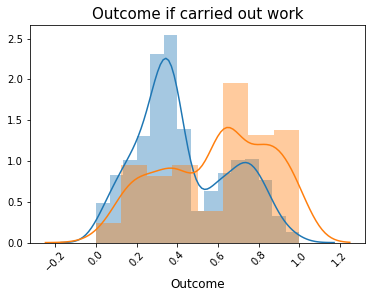

In [144]:
work_y = df[df['workyn']=='WorkY']
x_1 = work_y.outcomex.fillna(work_y.outcomex.median())

work_n = df[df['workyn']=='WorkN']
x_2 = work_n.outcomex.fillna(work_n.outcomex.median())

sns.distplot(x_1, label = 'Outcome if Work Yes')
sns.distplot(x_2, label = 'Outcome if Work No')


plt.xticks(rotation=45)
plt.xlabel("Outcome", fontsize= 12)
plt.title("Outcome if carried out work", fontsize= 15)

**Recommend** [slide] Would you recommend to other friends in your situation to pursue similar work to the one in your story?  `not at all`, `entirealy`

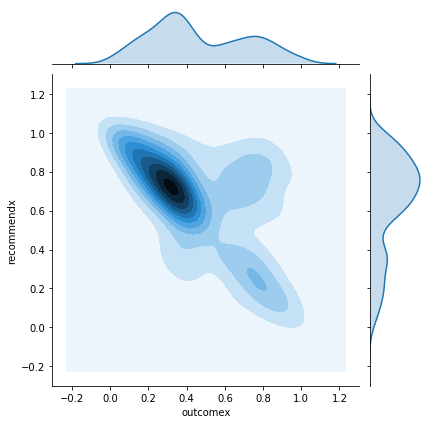

In [118]:
sns.jointplot(x="outcomex", y="recommendx", data=df, kind="kde");

## Text analysis

In [36]:
df.fragmententry.head()

0    since arriving, no job depite extensive search...
1    since I came in 2013 I was depressed and despe...
2    Ahmad arrived 5 years ago and started looking ...
3    I came to Jordan and then got married and star...
4    I worked with Oxfam as a raising awareness and...
Name: fragmententry, dtype: object

### Word counts

In [50]:
text = " ".join(msg for msg in df.fragmententry)
print ("There are {} words in all the responses.".format(len(text)))

There are 318852 words in all the responses.


### Cleaning

In [48]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['media', 'omit']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text = re.sub("(\\d|\\W)+"," ",text)
  text = re.sub(r'[^\x00-\x7f]',r'', text) 
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [51]:
cleantext = clean_txt(text)
print("There are {} words in all the responses after cleaning.".format(len(cleantext)))

There are 111775 words in all the responses after cleaning.


### Word frequencies

In [53]:
# split() returns list of all the words in the string 
split_it = cleantext.split() 
  
# Pass the split_it list to instance of Counter class. 
CounterVar = Counter(split_it)
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = CounterVar.most_common(10) 
  
most_occur

[('work', 1845),
 ('job', 469),
 ('oxfam', 440),
 ('good', 363),
 ('months', 347),
 ('experience', 346),
 ('camp', 334),
 ('income', 304),
 ('guard', 244),
 ('positive', 213)]

#### Word frequency by `workyn`

In [74]:
def mostfrequword (val):
    df2 = df[df['workyn']==val]
    text2 = " ".join(msg for msg in df2.fragmententry)
    cleantext2 = clean_txt(text2)
    split_it2 = cleantext2.split()
    CounterVars2 = Counter(split_it2)
    most_occur_5 = CounterVars2.most_common(5) 
    print(f"For {val} the most frequent words is {most_occur_5}")

In [76]:
mostfrequword('WorkN')
mostfrequword('WorkY')

For WorkN the most frequent words is [('work', 346), ('job', 123), ('experience', 96), ('oxfam', 88), ('apply', 75)]
For WorkY the most frequent words is [('work', 1499), ('oxfam', 352), ('job', 346), ('good', 305), ('months', 287)]


## Sentiment analysis

In [77]:
df.fragmententry[10]

'we came to Jordan and I started looking for a job until I worked with an organisation in water distribution. I worked for w while and the income was ok because I nee to fulfil the family needs. they fired me and I started looking for other jobs'

In [78]:
clean_txt(df.fragmententry[10])

'come jordan start look job work organisation water distribution work income nee fulfil family need fire start look job'

#### Polarity, Subjectivity, and Word ratio

In [79]:
def evaluate_polarity(text):
  return TextBlob(text).sentiment[0]

def evaluate_subjectivity(text):
  return  TextBlob(text).sentiment[1]

def compute_word_ratio(text):
  if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
  else:
         return 0

In [81]:
%%time
df['polarity'] = df.fragmententry.apply(evaluate_polarity)
df['subjectivity'] = df.fragmententry.apply(evaluate_subjectivity)
df['word_ratio'] = df.fragmententry.apply(compute_word_ratio)

Wall time: 2.24 s


In [82]:
measures = ['polarity', 'subjectivity', 'word_ratio']
df[measures].describe()

,polarity,subjectivity,word_ratio
count,1405.000000,1405.000000,1405.000000
mean,0.088912,0.436152,0.287995
std,0.290793,0.259845,0.084203
min,-0.900000,0.000000,0.000000
25%,-0.055556,0.295833,0.227273
50%,0.000000,0.470833,0.285714
75%,0.250000,0.600000,0.351351
max,1.000000,1.000000,0.551724


#### Polarity
The polarity score is a float within the range (-1.0, 1.0), with negative values associated with more negative words, and positive values associated with positive words. Here below some examples of positive and negative messagges.

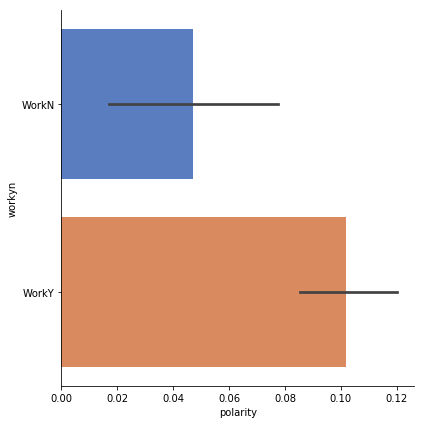

In [92]:
g = sns.catplot(x="polarity", y="workyn", data=df, height=6, kind="bar", palette="muted")
plt.savefig("image/catplot_polarity_workyn.png")

### Word cloud

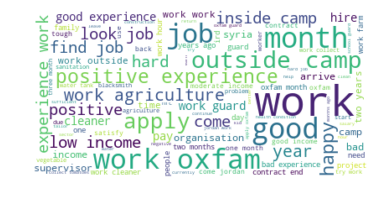

In [93]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cleantext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()